<a href="https://www.kaggle.com/code/rafaeldsn/house-prices-prediction-ml-competition?scriptVersionId=128550903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **House Prices Prediction - ML Competition**

# **1. Imports and Data Information**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import math

In [2]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv") 
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Removing Id Column
train_df = train.drop('Id', axis=1)
test_df = test.drop('Id', axis=1)
train_df.shape

(1460, 80)

# **2. NaN Treatment**

In [5]:
# Percentage of NaN values in each column
missing_percentages = train_df.isnull().sum()/len(train_df)
missing_percentages

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [6]:
# Columns with missing values
missing_percentages[missing_percentages>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
# Columns with more than 20% of missing values
missing_percentages[missing_percentages>0.2]

Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

<p style="font-size:14px"> <b>The columns with more than 20% of missing values will be discarded, and this variables are:</b><br>
              <p style="text-indent: 60px"> <b>Alley</b>: Type of alley access</p>
              <p style="text-indent: 60px"> <b>FireplaceQu</b>: Fireplace quality</p>
              <p style="text-indent: 60px"> <b>PoolQC</b>: Pool quality</p>
              <p style="text-indent: 60px"> <b>Fence</b>: Fence quality</p>
              <p style="text-indent: 60px"> <b>MiscFeature</b>: Miscellaneous feature not covered in other categories</p>
    </p>

In [8]:
# Deleting the columns with more than 20% of missing values
more_than_20pc_na = missing_percentages[missing_percentages>0.2].index
train_df.drop(columns=more_than_20pc_na, inplace = True)
test_df.drop(columns=more_than_20pc_na, inplace = True)
train_df.shape

(1460, 75)

In [9]:
# New Percentage of missing values
missing_percentages_2 = train_df.isnull().sum()/len(train_df)
not_complete_cols = missing_percentages_2[missing_percentages_2>0]
not_complete_cols

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [10]:
# Index of not complete columns
not_complete_cols_index = not_complete_cols.index
not_complete_cols_index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [11]:
# Number of rows with at least one missing data
train_df.isna().any(axis=1).sum()

366

### - After the EDA the NaN values will be imputed with the mode

# **3. EDA - Exploratory Data Analysis**

# 3.1 Numerical Variables EDA

### - At first the correlation between numerical variables will be analyzed.

<AxesSubplot:>

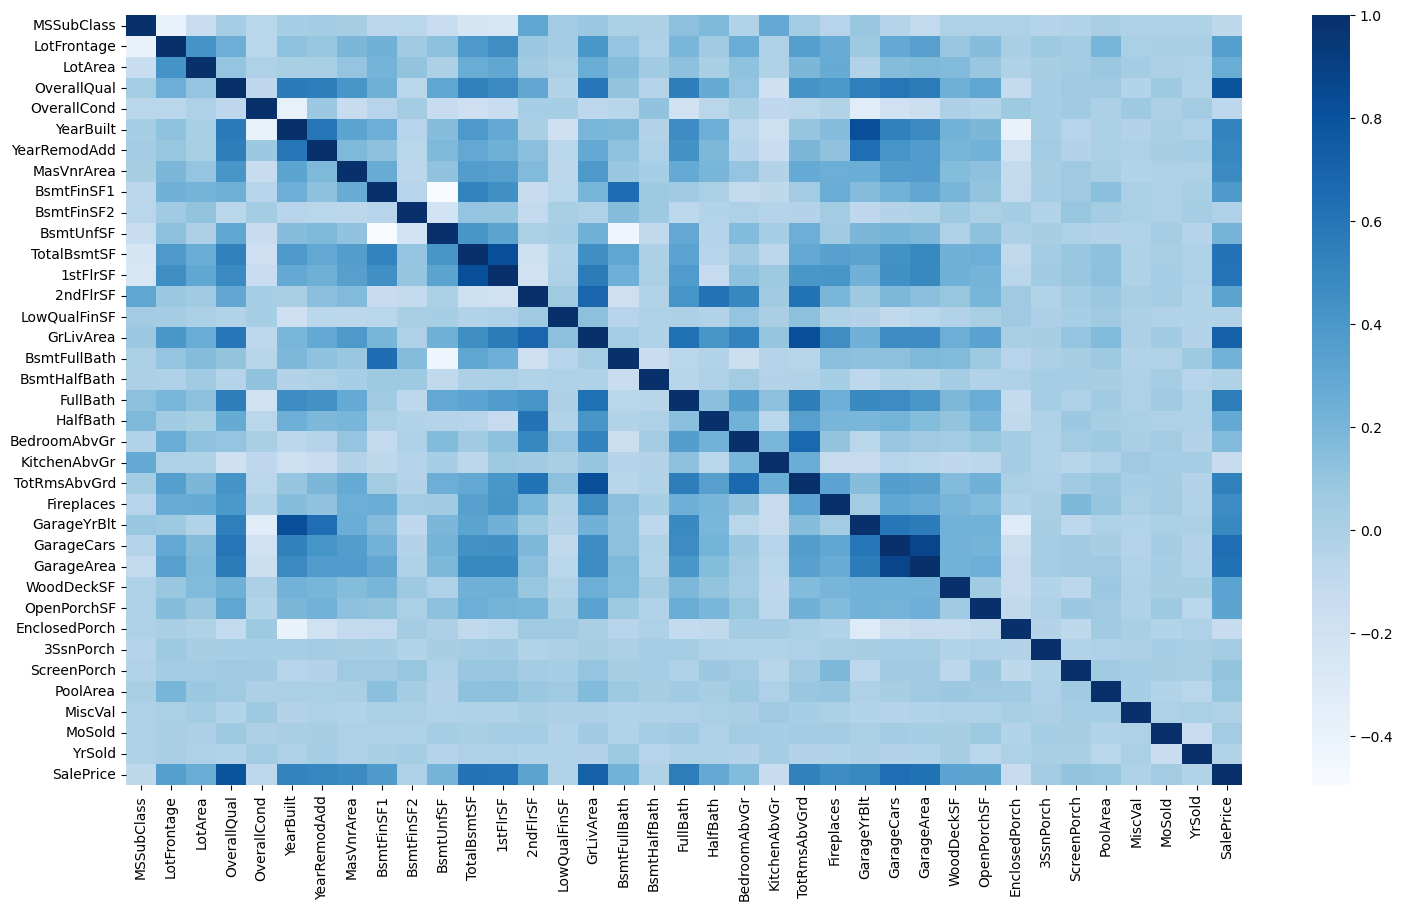

In [12]:
# HEATMAP CORRELATIONS
corr_train = train_df.corr()
plt.figure(figsize=(18,10))

sns.heatmap(corr_train, cmap="Blues")


<AxesSubplot:>

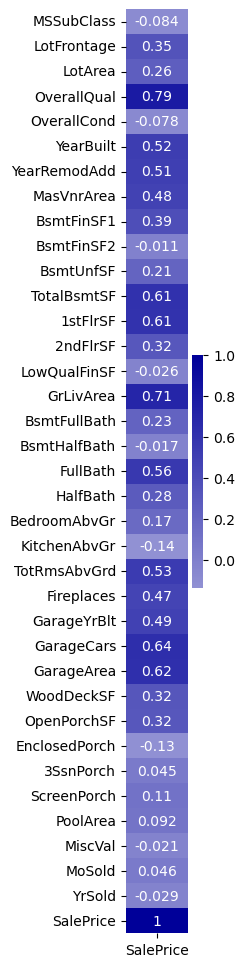

In [13]:
# Correlation with the SalesPrice column
corr_price = corr_train[['SalePrice']]

# Color map with dark blue in -1 and 1, white in 0 and gradual transition between extremes
plt.figure(figsize=(1,12))
colors = [(1, 1, 1), (0, 0, 0.6)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
sns.heatmap(corr_price, annot = True, cmap=cmap, center=0)

<p style="font-size:18px">From the values of Pearson correlation described in "Straightforward Statistics for the Behavioral Sciences" by James D. Evans (1996):</p>

<p style="font-size:18px; text-align:center">
    <b>Pearson Correlation</b><br>
0.00 ~ 0.19 = very weak<br>
0.20 ~ 0.39 = weak<br>
0.40 ~ 0.59 = moderate<br>
0.60 ~ 0.79 = strong<br>
0.80 ~ 1.00 = very strong</p>

<p style="font-size:18px">And Analyzing the correlations above between the numerical variables and SalePrice, all the variables with a correlation value of less than 0.4 will be removed.</p>

In [14]:
# Correlation price as absolute values
corr_abs = corr_price.abs()

# Filtering the variables with less than 0.4 correlation with SalePrice
low_cor_vars = (corr_price[corr_abs<0.4].dropna()).index.tolist()
low_cor_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
train_df.drop(columns=low_cor_vars, inplace= True)
test_df.drop(columns=low_cor_vars, inplace = True)

train_df.shape

(1460, 52)

<AxesSubplot:>

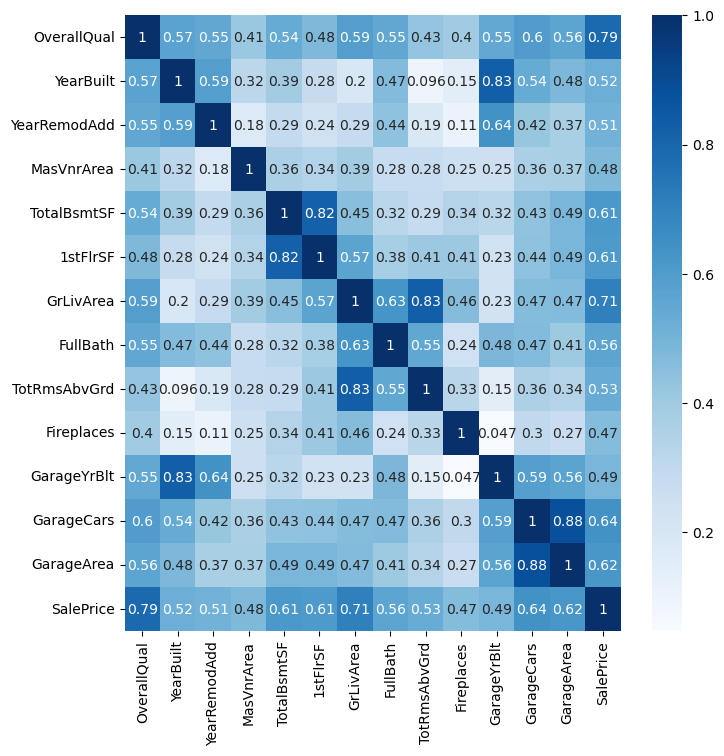

In [16]:
# HEATMAP CORRELATIONS AFTER FILTERING NUMERICAL VARIABLES WITH LOW CORRELATION WITH SALEPRICE
corr_train = train_df.corr()
plt.figure(figsize=(8,8))

sns.heatmap(corr_train, cmap="Blues", annot=True)


<p style="font-size:18px"> - We can see above, there are highly correlated variables which can represent redundant information. For example the columns GarageCars and GarageArea.</p>

<p style="font-size:18px; text-align:center">
    <b>Variables Highly Correlated</b><br>
    YearBuilt + <s>GarageYrBlt</s> -> 0.83<br>
TotalBsmtSf + <s>1stFlrSf</s> -> 0.82<br>
GrLivArea + <s>TotRmsAbvGrd</s> -> 0.83<br>
Garage Area + <s>GarageCars</s> -> 0.88<br></p>

In [17]:
train_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)
test_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)
train_df.shape

(1460, 48)

# 3.2 Categorical Variables EDA

In [18]:
# Filtering only the categorical Variables
train_cat_vars = train_df.select_dtypes(exclude='number')
train_cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [19]:
# Inserting SalePrice in the Categorical Variables Dataframe
train_cat_vars = train_cat_vars.join(train_df['SalePrice'])
train_cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

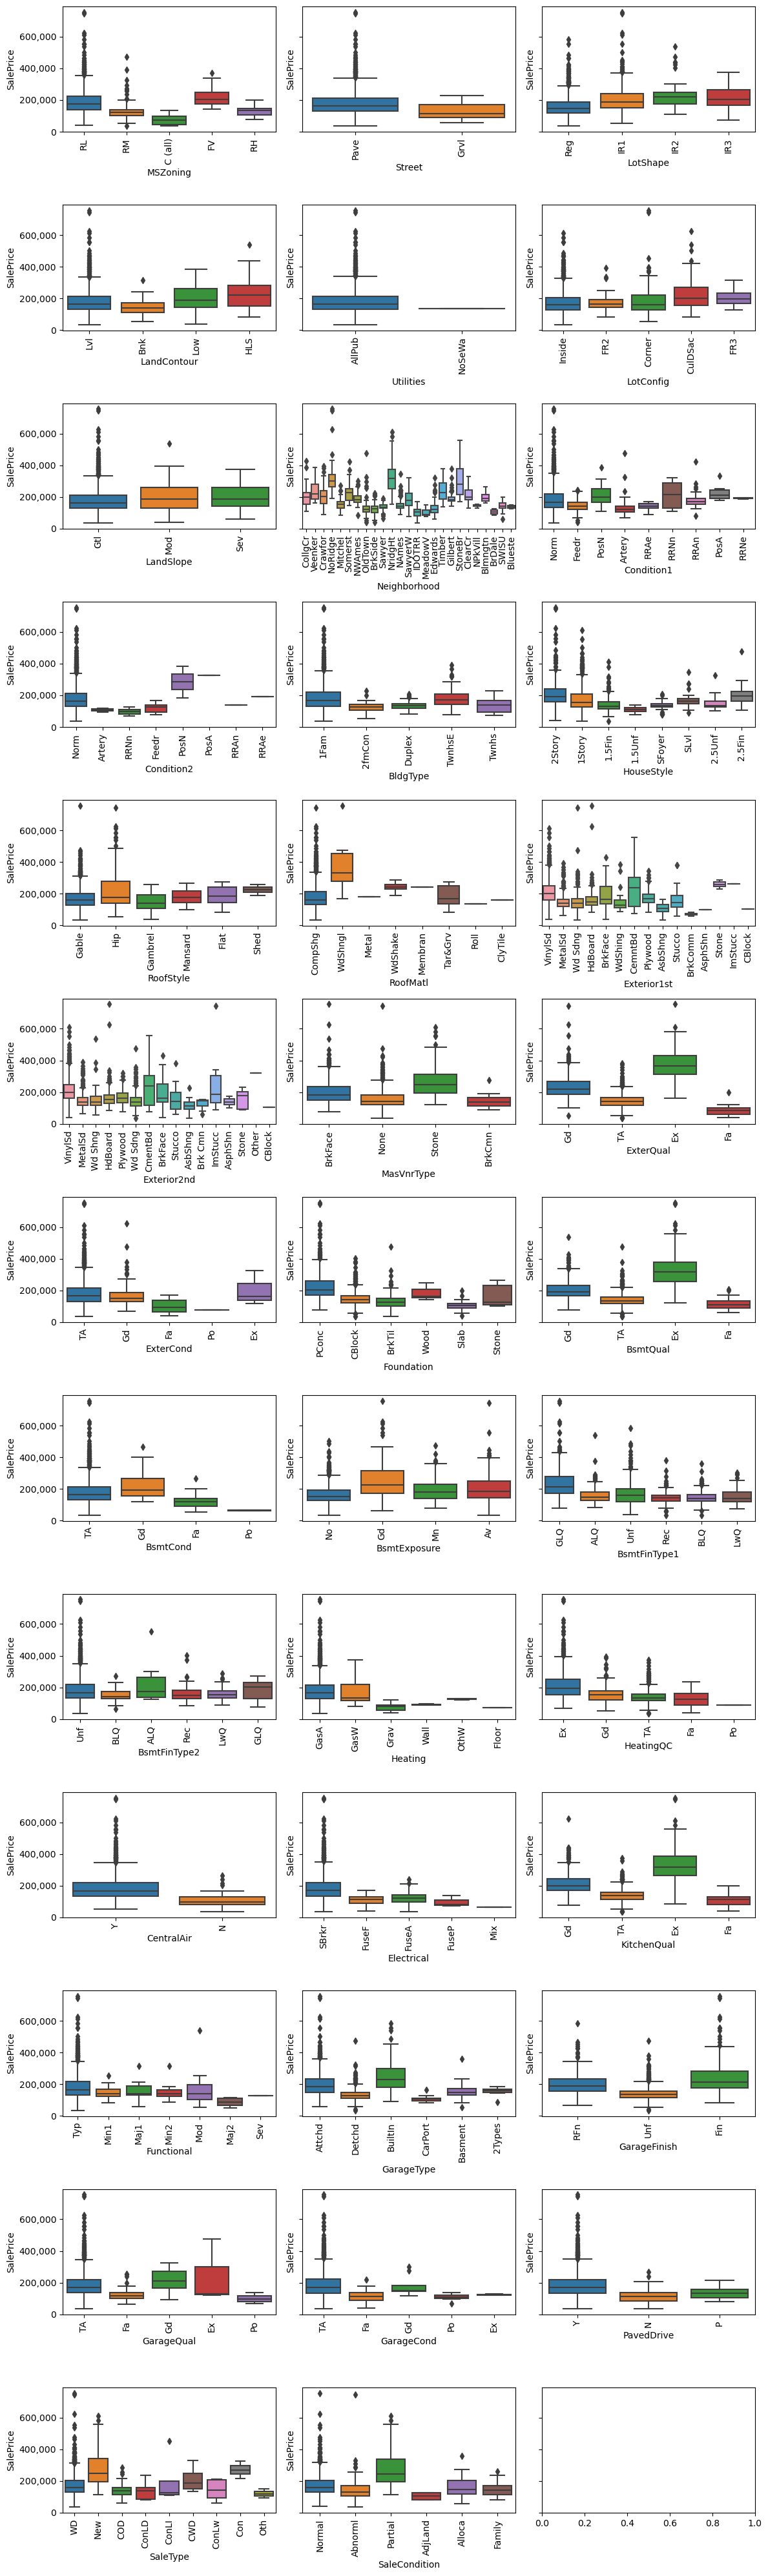

In [20]:
# Boxplot of all the 38 variables in a grid of 13 x 3
fig, axes = plt.subplots(round(len(train_cat_vars.columns) / 3), 3, figsize=(12,40), sharey = True)

for i, ax in enumerate(fig.axes):
    if i < (len(train_cat_vars.columns)-1):
        sns.boxplot(data=train_cat_vars, x=train_cat_vars.columns[i], y='SalePrice', ax=ax)
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
fig.tight_layout()

### - At first the categorical variables with only two unique values will be analyzed separatedly, and the other variables will be analyzed using a nonparametric ANOVA test.

In [21]:
# New dataframe of categorical data with two unique values
two_val_cols_index = [col for col in train_cat_vars.columns if train_cat_vars[col].nunique() == 2]

two_val_cols = train_cat_vars[two_val_cols_index]

In [22]:
for col in two_val_cols.columns:
    print(f"\n{col}:\n{two_val_cols[col].value_counts().to_string()}")


Street:
Pave    1454
Grvl       6

Utilities:
AllPub    1459
NoSeWa       1

CentralAir:
Y    1365
N      95


### The Variables Street and Utilities have one of the values with too few occurencies, so in order to simplify the analysis only the CentralAir(Central Air Conditioning) variable will be tested.

In [23]:
train_df.drop(columns = ['Utilities', 'Street'], inplace=True)
test_df.drop(columns = ['Utilities', 'Street'], inplace = True)
train_df.shape

(1460, 46)

In [24]:
# New DataFrame with only the CentralAir Variable
two_val_cols = two_val_cols.join(train_df['SalePrice'])
central_air = two_val_cols.drop(['Street', 'Utilities'], axis=1)
central_air

,CentralAir,SalePrice
0,Y,208500
1,Y,181500
2,Y,223500
3,Y,140000
4,Y,250000
...,...,...
1455,Y,175000
1456,Y,210000
1457,Y,266500
1458,Y,142125


In [25]:
# Two new dataframes considering the SalePrice of the houses with and without Central Air Conditioning

central_air_y = central_air.loc[central_air['CentralAir'] == 'Y']
central_air_n = central_air.loc[central_air['CentralAir'] == 'N']

In [26]:
central_air_y

,CentralAir,SalePrice
0,Y,208500
1,Y,181500
2,Y,223500
3,Y,140000
4,Y,250000
...,...,...
1455,Y,175000
1456,Y,210000
1457,Y,266500
1458,Y,142125


In [27]:
central_air_n

,CentralAir,SalePrice
29,N,68500
30,N,40000
39,N,82000
52,N,110000
61,N,101000
...,...,...
1387,N,136000
1393,N,163000
1412,N,90000
1443,N,121000


Text(0, 0.5, 'Count')

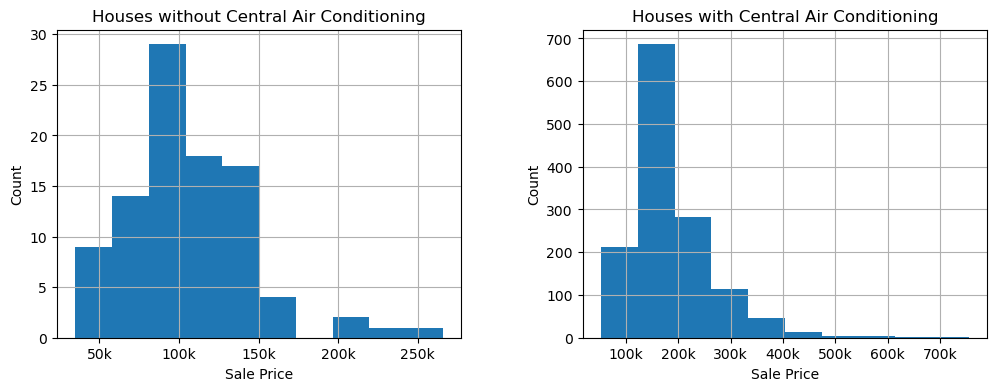

In [28]:
# Histogram of SalePrice of Houses with and without Central Air Conditioning

fig, axes = plt.subplots(1,2, figsize=(12,4))

central_air_n.hist('SalePrice',ax=axes[0])
axes[0].set_title("Houses without Central Air Conditioning")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Count')

central_air_y.hist('SalePrice',ax=axes[1])
axes[1].set_title("Houses with Central Air Conditioning")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[1].set_xlabel('Sale Price')
axes[1].set_ylabel('Count')


### - Before performing the tests to determine if there is a significant difference between the means of the two samples the normality assumption will be checked.

## **SHAPIRO-WILK TEST**

### The **Shapiro–Wilk test** is a test of normality, where the null hypothesis is that the sample has been generated from a normal distribution. If the p-value is low, the null hypothesis is rejected.

### **p-value<0.05** -> reject the null hypothesis (The samples are not generated from a normal distribution)

### **p-value>0.05** -> failed to reject the null hypothesis (We don't have sufficient evidence to say that the sample does not come from a normal distribution)
 

In [29]:
shapiro(central_air_y['SalePrice'])

ShapiroResult(statistic=0.8567324876785278, pvalue=1.703071827505677e-33)

In [30]:
shapiro(central_air_n['SalePrice'])

ShapiroResult(statistic=0.925995409488678, pvalue=4.627940143109299e-05)

## As we can see from the results in the Shapiro Wilkins test the distributions are not normal and a nonparametric test will be used.

## **Mann-Whitney U test** is a non-parametric alternative test to the independent sample t-test, and it can be used to test whether two samples are likely to derive from the same population.

### **Null Hypothesis**: two samples come from the same population


### **p-value<0.05** -> reject the null hypothesis (The samples are not from the same population)

### **p-value>0.05** -> failed to reject the null hypothesis (We don't have sufficient evidence to say that the samples come from the same population)


In [31]:
stats.mannwhitneyu(x=central_air_y['SalePrice'], y=central_air_n['SalePrice'], alternative = 'two-sided')

MannwhitneyuResult(statistic=112385.0, pvalue=5.3277134372271244e-33)

## From the test above we reject the null hypothesis and we can consider that there is a significant difference between the two populations, so the CentralAir Variable remains in the model.

In [32]:
train_cat_vars

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125


In [33]:
# Categorical variables with at least 3 unique values
cat_var_3v = train_cat_vars.drop(two_val_cols_index, axis=1)
cat_var_3v

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125


## For the categorical variables with at least 3 unique values it will be performed the **Kruskal-Wallis** test to select the top 5 variables with more significant difference between groups (lowest p-value).

In [34]:
# Categorical Variables

cat_var_list = list(cat_var_3v.columns)
cat_var_list.remove('SalePrice')
cat_var_list

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
# Target Variable
target_variable = 'SalePrice'

In [36]:
# Dataframe with the p-value for each Variable

df_kruskal = pd.DataFrame(columns=['Variable', 'statistic', 'pvalue'])

for var in cat_var_list:
    groups = []
    for group in cat_var_3v[var].dropna().unique():
        
        list_of_values = cat_var_3v[target_variable][cat_var_3v[var] == group].values
                
        list_of_values = [x for x in list_of_values if np.isnan(x) == False]
        
        groups.append(list_of_values)
        
    statistic, pvalue = kruskal(*groups)
    row = {'Variable': var, 'statistic': statistic, 'pvalue': pvalue}
    df_kruskal = df_kruskal.append(row, ignore_index=True)
    
    
df_kruskal.sort_values(by=['pvalue'], ignore_index=True, inplace=True)
        
df_kruskal

,Variable,statistic,pvalue
0,Neighborhood,868.532376,6.696799e-168
1,ExterQual,683.440084,8.180798e-148
2,KitchenQual,661.481587,4.720113e-143
3,BsmtQual,631.833154,1.265030e-136
4,GarageFinish,505.207812,1.974775e-110
5,Foundation,488.722751,2.169096e-103
6,GarageType,421.154508,8.166415e-89
7,HeatingQC,356.776407,6.036449e-76
8,BsmtFinType1,298.223280,2.413404e-62
9,MasVnrType,275.674763,1.826801e-59


## Selecting the top 5 categorical variables in terms of significant difference between groups

In [37]:
# Choosing the top 5 more relevant categories -> lowest pvalue
df_top5_cat_var = df_kruskal[:5]
df_top5_cat_var

,Variable,statistic,pvalue
0,Neighborhood,868.532376,6.696799e-168
1,ExterQual,683.440084,8.180798e-148
2,KitchenQual,661.481587,4.720113e-143
3,BsmtQual,631.833154,1.265030e-136
4,GarageFinish,505.207812,1.974775e-110


In [38]:
list_top5_cat_vars = df_top5_cat_var['Variable'].tolist()
list_top5_cat_vars

['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish']

In [39]:
# Deleting Variables with less statistical difference between groups

vars_to_delete = [x for x in cat_var_list if x not in list_top5_cat_vars]
train_df.drop(columns = vars_to_delete, inplace=True)
test_df.drop(columns = vars_to_delete, inplace = True)
train_df.shape

(1460, 16)

In [40]:
train_df

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageFinish,GarageArea,SalePrice
0,CollgCr,7,2003,2003,196.0,Gd,Gd,856,Y,1710,2,Gd,0,RFn,548,208500
1,Veenker,6,1976,1976,0.0,TA,Gd,1262,Y,1262,2,TA,1,RFn,460,181500
2,CollgCr,7,2001,2002,162.0,Gd,Gd,920,Y,1786,2,Gd,1,RFn,608,223500
3,Crawfor,7,1915,1970,0.0,TA,TA,756,Y,1717,1,Gd,1,Unf,642,140000
4,NoRidge,8,2000,2000,350.0,Gd,Gd,1145,Y,2198,2,Gd,1,RFn,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,2000,0.0,TA,Gd,953,Y,1647,2,TA,1,RFn,460,175000
1456,NWAmes,6,1978,1988,119.0,TA,Gd,1542,Y,2073,2,TA,2,Unf,500,210000
1457,Crawfor,7,1941,2006,0.0,Ex,TA,1152,Y,2340,2,Gd,2,RFn,252,266500
1458,NAmes,5,1950,1996,0.0,TA,TA,1078,Y,1078,1,Gd,0,Unf,240,142125


## The Kruskal-Wallis test does not says which group/groups is/are different from the others. To know this we need a post-hoc test, and the test that will be used here is the **Dunn's test**, which is a pairwise multiple comparisons procedure used to determine which groups have more statistically significant differences:

## **Null Hypothesis** -> There is no difference between groups 

## **Low p-value** -> The groups differ significantly

In [41]:
# Dataframe for the post-hoc test
df_post_hoc = cat_var_3v[list_top5_cat_vars]
df_post_hoc = df_post_hoc.join(cat_var_3v['SalePrice'])
df_post_hoc

,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,SalePrice
0,CollgCr,Gd,Gd,Gd,RFn,208500
1,Veenker,TA,TA,Gd,RFn,181500
2,CollgCr,Gd,Gd,Gd,RFn,223500
3,Crawfor,TA,Gd,TA,Unf,140000
4,NoRidge,Gd,Gd,Gd,RFn,250000
...,...,...,...,...,...,...
1455,Gilbert,TA,TA,Gd,RFn,175000
1456,NWAmes,TA,TA,Gd,Unf,210000
1457,Crawfor,Ex,Gd,TA,RFn,266500
1458,NAmes,TA,Gd,TA,Unf,142125


In [42]:
# Installing and importing the scikit-posthocks package
!pip install scikit-posthocs

import scikit_posthocs as sp

In [43]:
df_post_hoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   ExterQual     1460 non-null   object
 2   KitchenQual   1460 non-null   object
 3   BsmtQual      1423 non-null   object
 4   GarageFinish  1379 non-null   object
 5   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 68.6+ KB


In [44]:
# List with the matrices related to each variable for the posthoc test
list_dunn_matrices = []
# dropna to perform the post-hoc test
df_post_hoc.dropna(inplace=True)

for var in list_top5_cat_vars:    
    dunn_matrix = sp.posthoc_dunn(df_post_hoc, val_col = 'SalePrice', group_col = var, p_adjust='bonferroni')
    list_dunn_matrices.append(dunn_matrix)

## **Neighborhood**

<AxesSubplot:>

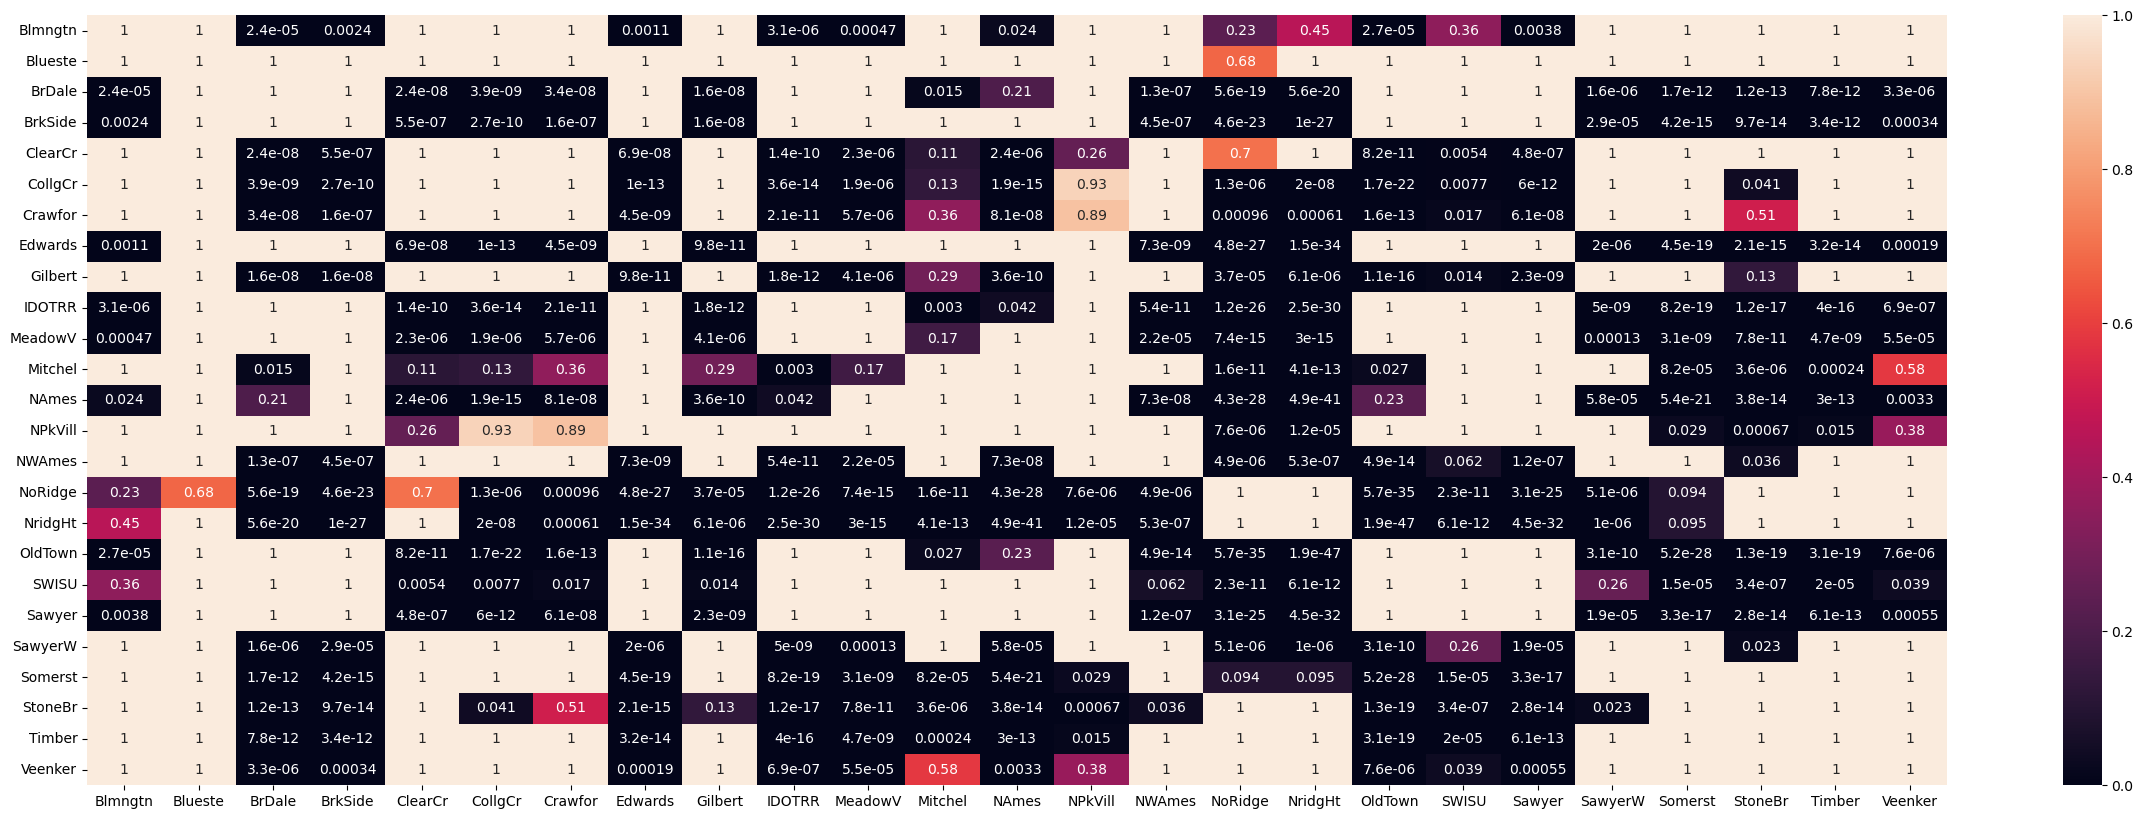

In [45]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(list_dunn_matrices[0], annot = True)

## From the heatmap above we can see some groups with similar behaviours with high p-value between each other. So we will separate them in groups in order to aggregate the variables that doesn't differ significantly.

In [46]:
dataframe_dunn = list_dunn_matrices[0]

<AxesSubplot:>

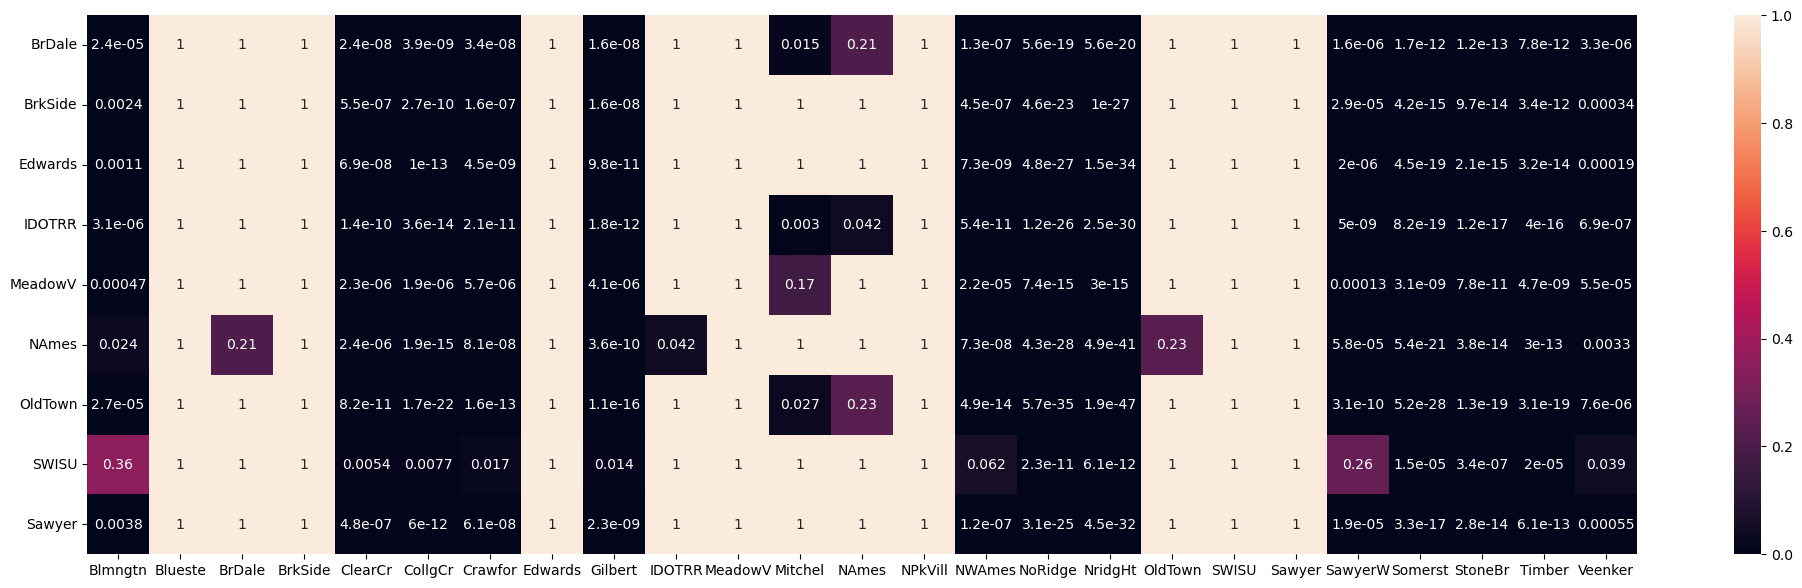

In [47]:
# GROUP A
group_a = ['BrDale', 'BrkSide', 'Edwards', 'IDOTRR', 'MeadowV', 'NAmes', 'OldTown', 'SWISU', 'Sawyer']

group_a_dunn_df = dataframe_dunn.loc[group_a]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_a_dunn_df, annot=True)

In [48]:
# DataFrame with only the houses in the Group A neighborhoods

neighborhood_dataframe = cat_var_3v[['Neighborhood', 'SalePrice']]

df_group_a = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_a)]
df_group_a


,Neighborhood,SalePrice
8,OldTown,129900
9,BrkSide,118000
10,Sawyer,129500
12,Sawyer,144000
14,NAmes,157000
...,...,...
1449,MeadowV,92000
1450,NAmes,136000
1452,Edwards,145000
1458,NAmes,142125


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

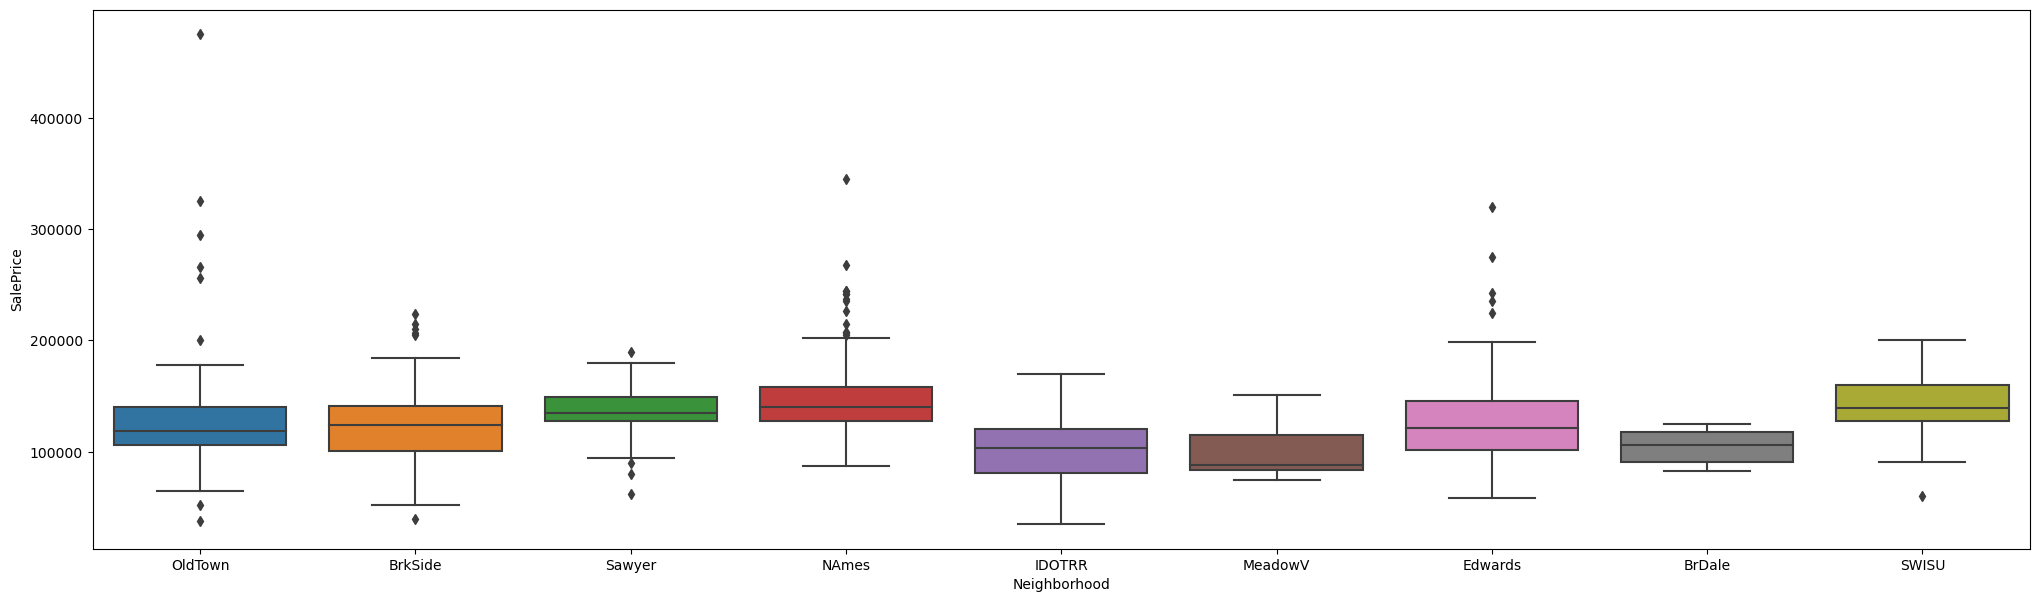

In [49]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.boxplot(data=df_group_a, x='Neighborhood', y='SalePrice')

<AxesSubplot:>

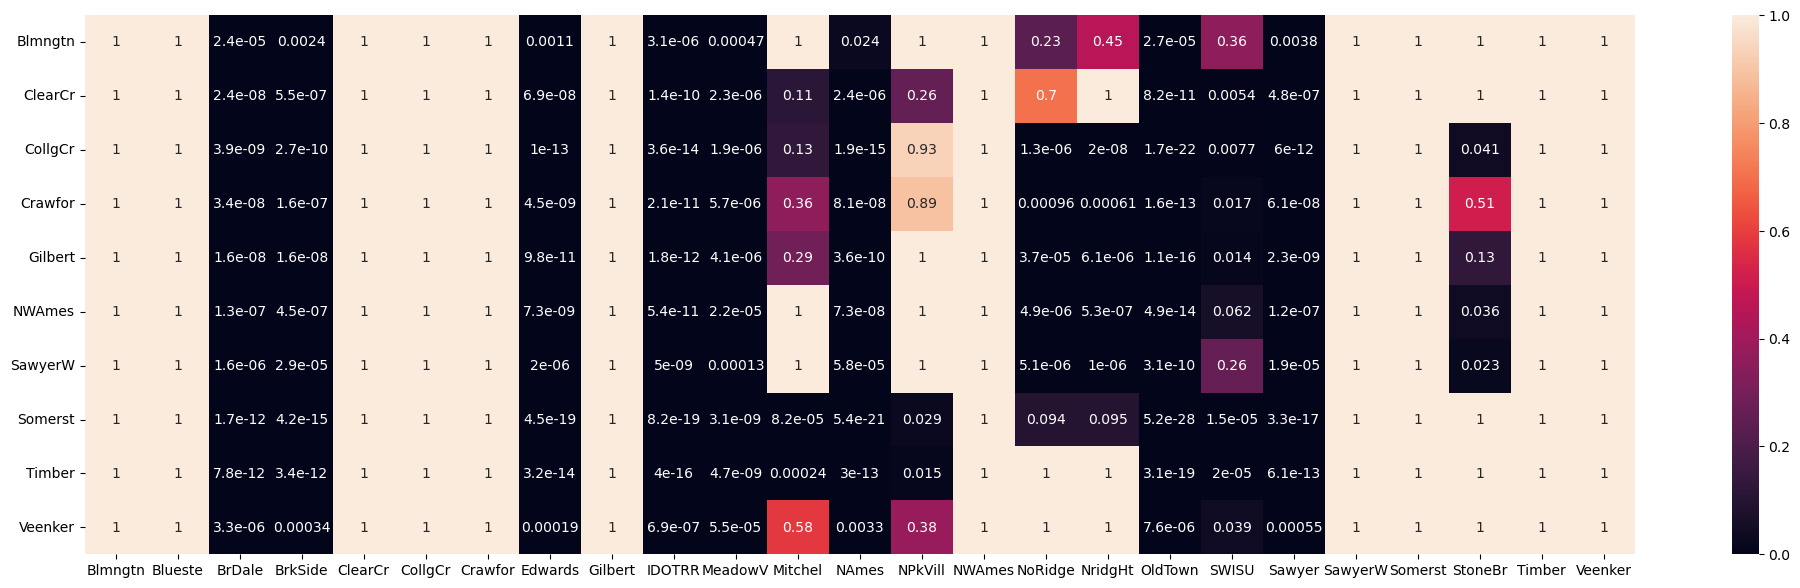

In [50]:
# GROUP B
group_b = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'SawyerW', 'Somerst', 'Timber', 'Veenker']

group_b_df = dataframe_dunn.loc[group_b]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_b_df, annot=True)

In [51]:
df_group_b = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_b)]
df_group_b

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
6,Somerst,307000
...,...,...
1451,Somerst,287090
1454,Somerst,185000
1455,Gilbert,175000
1456,NWAmes,210000


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

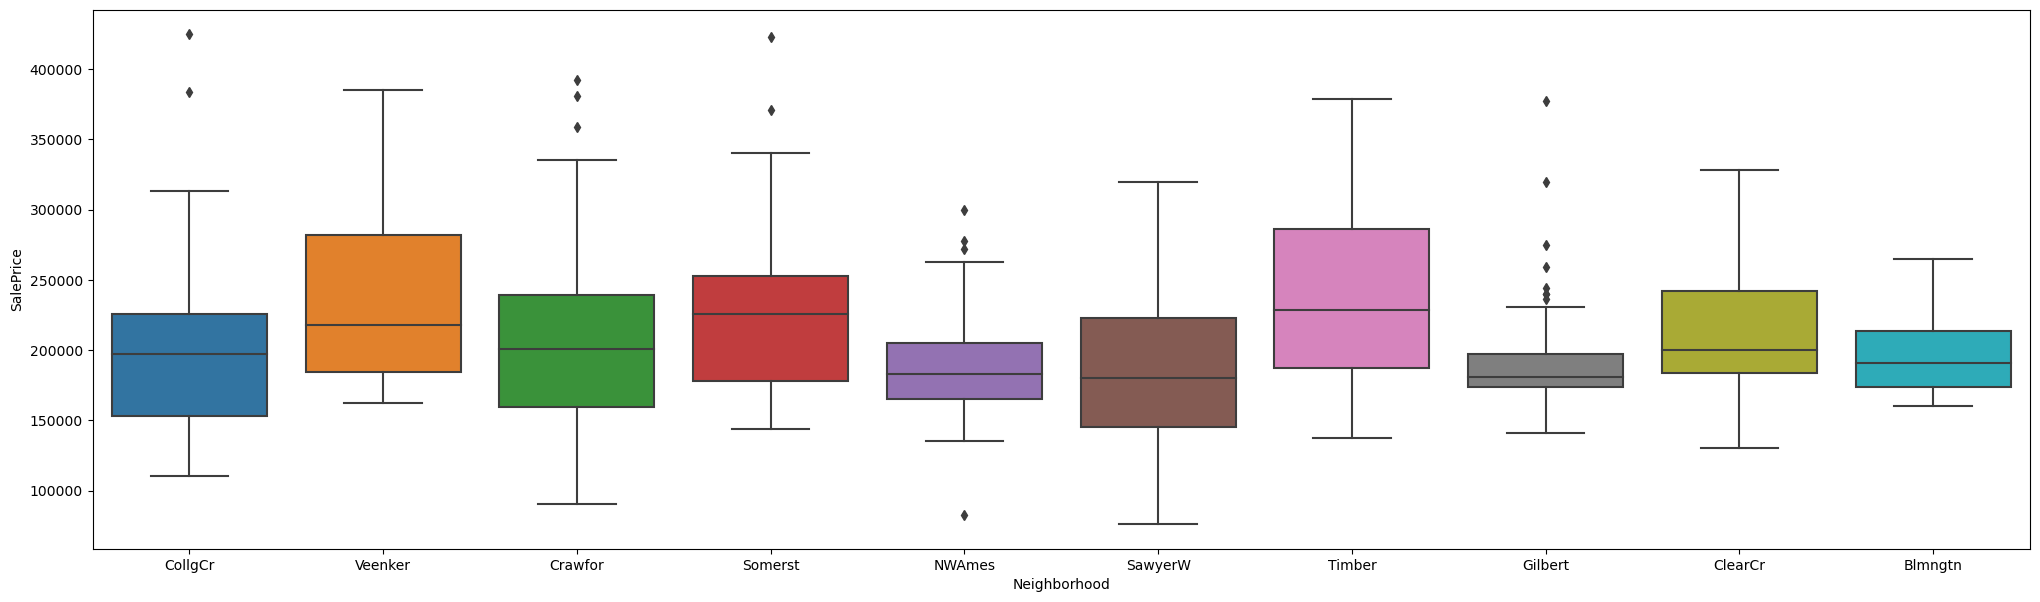

In [52]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.boxplot(data=df_group_b, x='Neighborhood', y='SalePrice')

<AxesSubplot:>

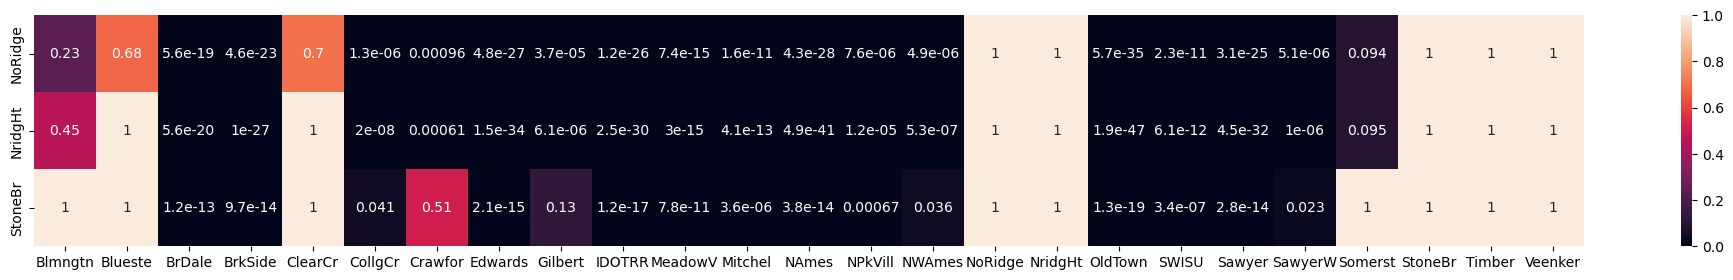

In [53]:
# Group C

group_c = ['NoRidge', 'NridgHt', 'StoneBr']

group_c_df = dataframe_dunn.loc[group_c]

fig, ax = plt.subplots(figsize=(25, 3))

sns.heatmap(group_c_df, annot=True)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

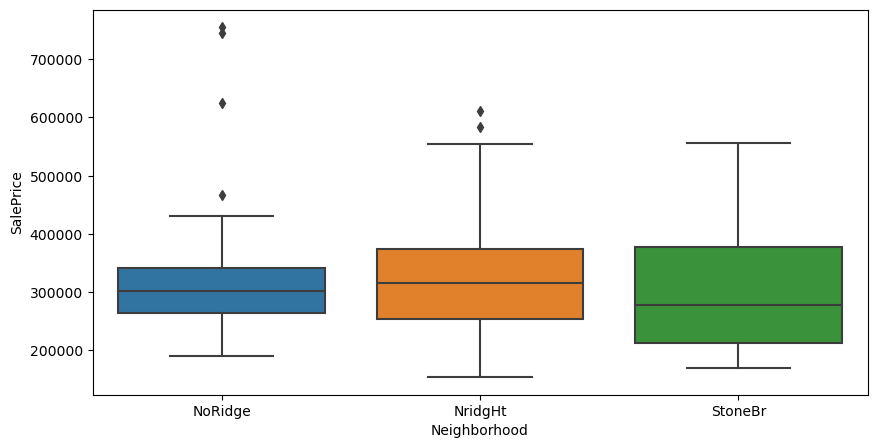

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

df_group_c = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_c)]
sns.boxplot(data=df_group_c, x='Neighborhood', y='SalePrice')

## As we can see by the boxplots, the houses in each group have a very similar SalePrice distribution.

In [55]:
# Selecting the neighborhoods not in groups A, B or C

unique_neighborhoods = train_cat_vars['Neighborhood'].unique().tolist()
unique_neighborhoods

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [56]:
# GROUP D
group_d = [x for x in unique_neighborhoods if x not in group_a]
group_d = [x for x in group_d if x not in group_b]
group_d = [x for x in group_d if x not in group_c]
group_d

['Mitchel', 'NPkVill', 'Blueste']

In [57]:
df_group_d = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_d)]
df_group_d

,Neighborhood,SalePrice
5,Mitchel,143000
46,Mitchel,239686
71,Mitchel,129500
81,Mitchel,153500
126,NPkVill,128000
137,Mitchel,171000
186,Mitchel,173000
195,NPkVill,148500
201,Mitchel,171500
274,Mitchel,124500


In [58]:
group_d_df = dataframe_dunn.loc[group_d]

<AxesSubplot:>

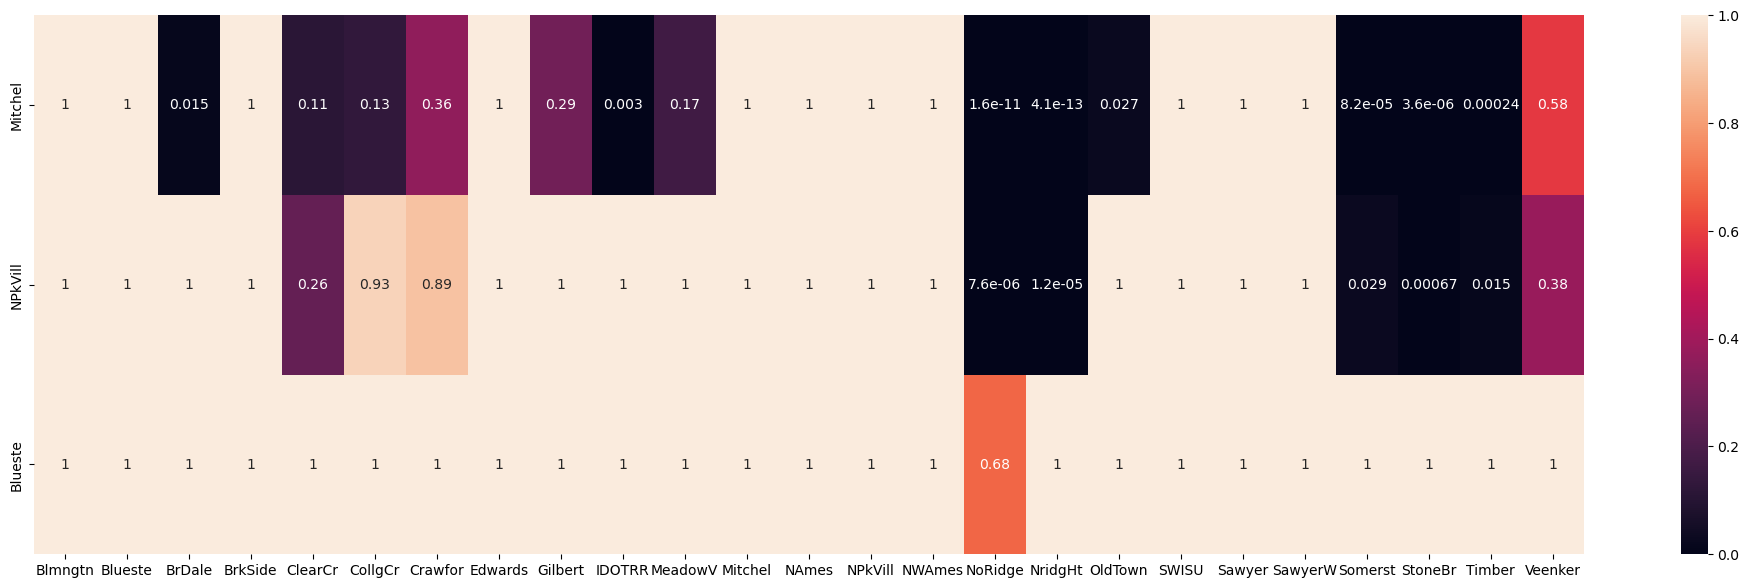

In [59]:
group_d_df = dataframe_dunn.loc[group_d]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_d_df, annot=True)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

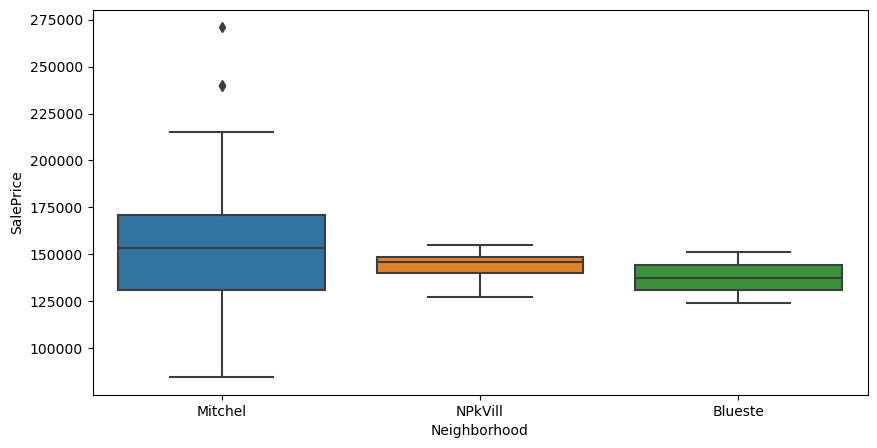

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_group_d, x='Neighborhood', y='SalePrice')

## These neighborhoods don't show much simmilarity with the other groups so they will be in group D.

### *The houses in the Mitchel group show some simmilarity with the B group, but they will remain in the D group because the p-value with the other groups are higher when compared to the groups in B.* 

In [61]:
def neighborhood_processing(df):
    for index, row in df.iterrows():
        if row['Neighborhood'] in group_a:
            df.at[index,'Neighborhood'] = 'A'
            
        elif row['Neighborhood'] in group_b:
            df.at[index,'Neighborhood'] = 'B'
            
        elif row['Neighborhood'] in group_c:
            df.at[index,'Neighborhood'] = 'C'
            
        else:
            df.at[index,'Neighborhood'] = 'D'

In [62]:
neighborhood_processing(train_df)
neighborhood_processing(test_df)

In [63]:
train_df['Neighborhood'].value_counts()

A    665
B    592
C    143
D     60
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

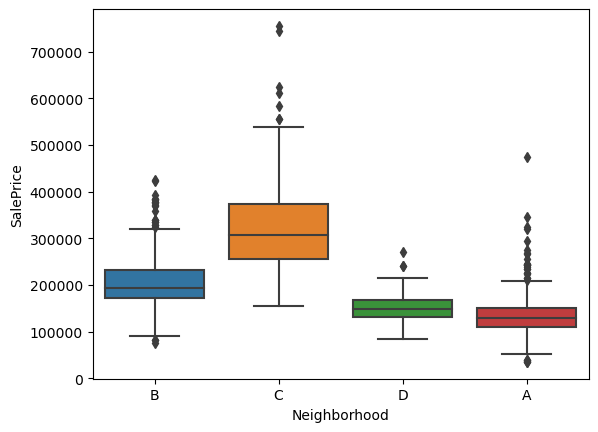

In [64]:
# New distribution of SalePrice per Neighborhood
sns.boxplot(data=train_df, x='Neighborhood', y='SalePrice')

## **EXTERNAL QUALITY**

<AxesSubplot:>

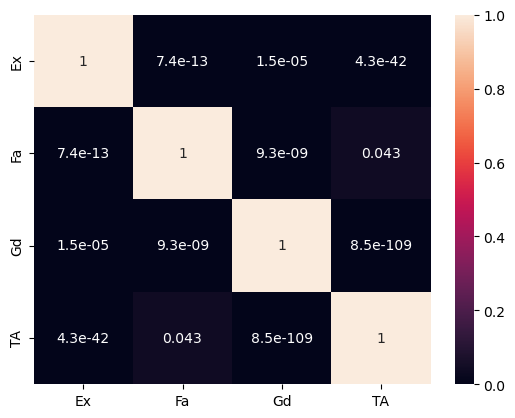

In [65]:
sns.heatmap(list_dunn_matrices[1], annot = True)

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

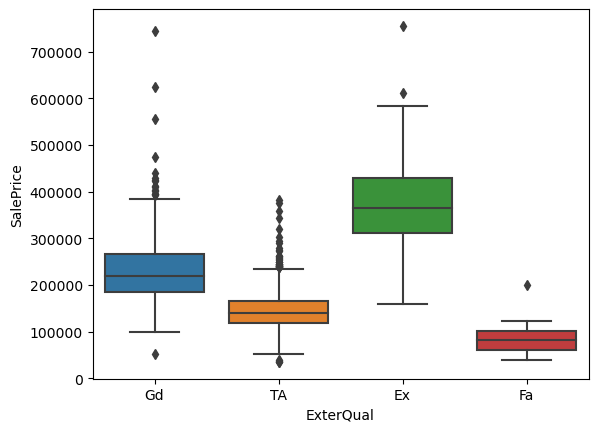

In [66]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[1], y='SalePrice')

## **KITCHEN QUALITY**

<AxesSubplot:>

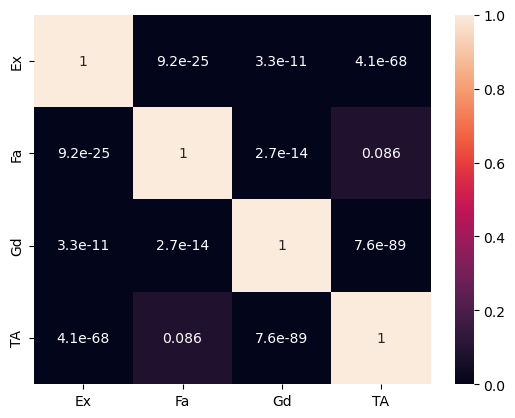

In [67]:
sns.heatmap(list_dunn_matrices[2], annot = True)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

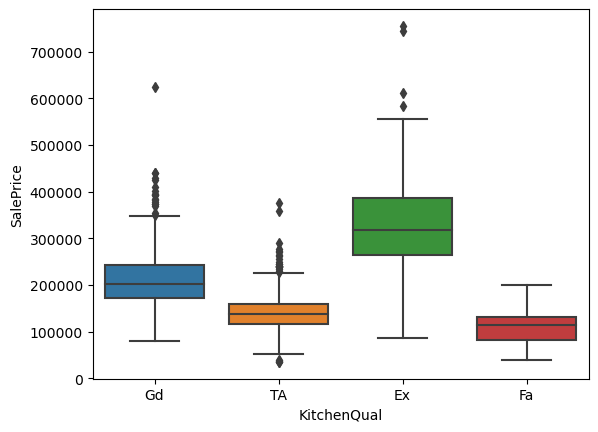

In [68]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[2], y='SalePrice')

### The p-value between TA and Fa is more than 0.05 so this two groups will be merged

In [69]:
for index, row in train_df.iterrows():
    if row['KitchenQual'] in ['TA', 'Fa']:
        train_df.at[index,'KitchenQual'] = 'TA_Fa'
        
        
for index, row in test_df.iterrows():
    if row['KitchenQual'] in ['TA', 'Fa']:
        test_df.at[index,'KitchenQual'] = 'TA_Fa'

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

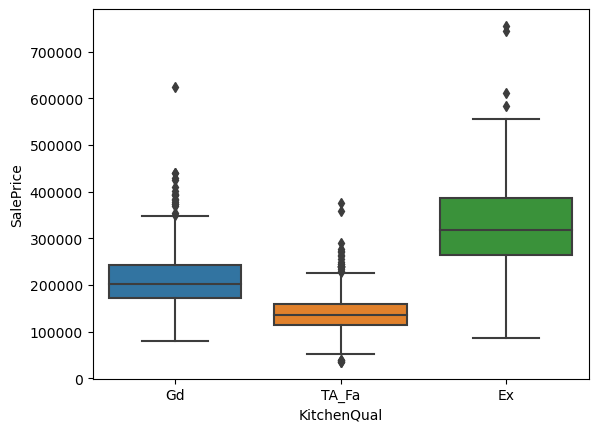

In [70]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[2], y='SalePrice')

In [71]:
train_df['KitchenQual'].value_counts()

TA_Fa    774
Gd       586
Ex       100
Name: KitchenQual, dtype: int64

## **BSMT QUAL**

<AxesSubplot:>

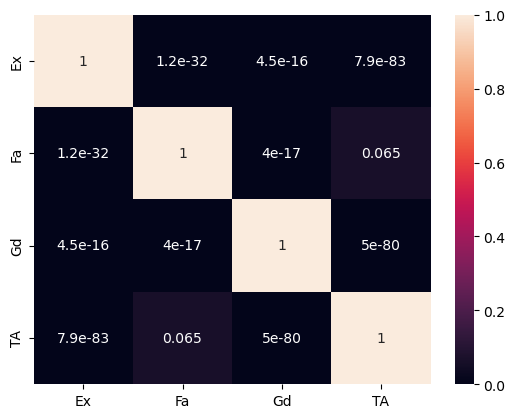

In [72]:
sns.heatmap(list_dunn_matrices[3], annot = True)

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

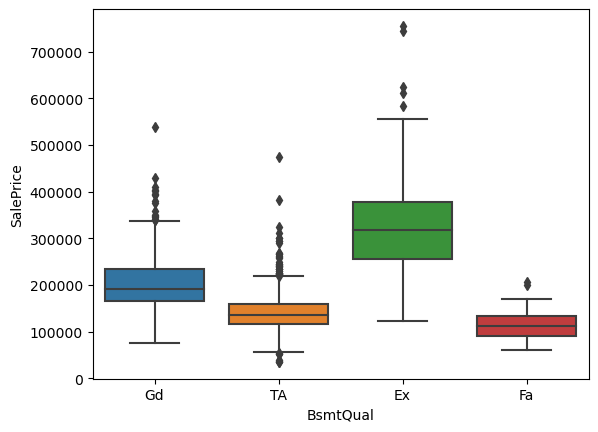

In [73]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[3], y='SalePrice')

### Again in here we can merge TA and Fa

In [74]:
for index, row in train_df.iterrows():
    if row['BsmtQual'] in ['TA', 'Fa']:
        train_df.at[index,'BsmtQual'] = 'TA_Fa'
        
        
for index, row in test_df.iterrows():
    if row['BsmtQual'] in ['TA', 'Fa']:
        test_df.at[index,'BsmtQual'] = 'TA_Fa'

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

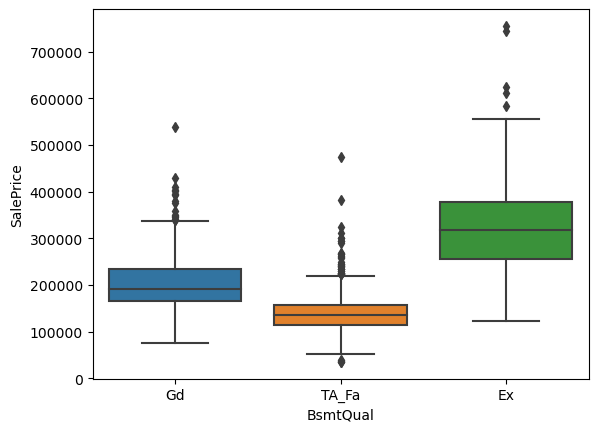

In [75]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[3], y='SalePrice')

In [76]:
train_df['BsmtQual'].value_counts()

TA_Fa    684
Gd       618
Ex       121
Name: BsmtQual, dtype: int64

## **GARAGE FINISH**

<AxesSubplot:>

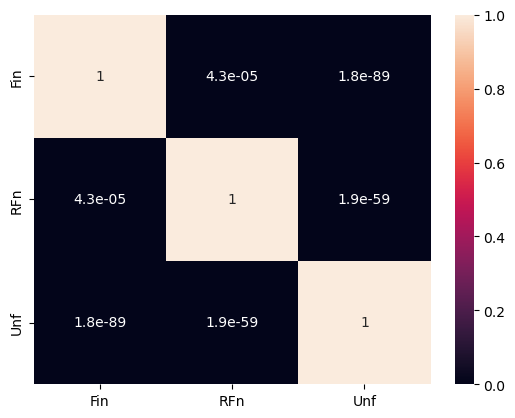

In [77]:
sns.heatmap(list_dunn_matrices[4], annot = True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

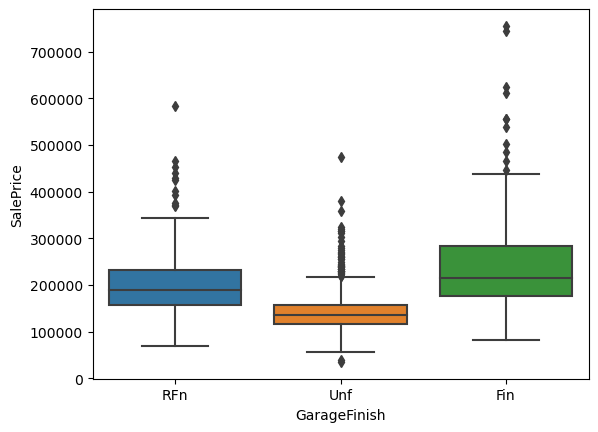

In [78]:
sns.boxplot(data=train_df, x=list_top5_cat_vars[4], y='SalePrice')

# **4. ONE HOT ENCONDING AND NAN TREATMENT**

### The NaN values will be replaces by the mode

In [79]:
train_df.isnull().sum()

Neighborhood     0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
ExterQual        0
BsmtQual        37
TotalBsmtSF      0
CentralAir       0
GrLivArea        0
FullBath         0
KitchenQual      0
Fireplaces       0
GarageFinish    81
GarageArea       0
SalePrice        0
dtype: int64

In [80]:
train_df.isna().any(axis=1).sum()

119

In [81]:
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])

In [82]:
train_df.isnull().sum()

Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
BsmtQual        0
TotalBsmtSF     0
CentralAir      0
GrLivArea       0
FullBath        0
KitchenQual     0
Fireplaces      0
GarageFinish    0
GarageArea      0
SalePrice       0
dtype: int64

### ONE-HOT-ENCODING

In [83]:
# The Categorical Variables are the top 5 most statistically significant and the CentralAir variable
final_cat_vars = list_top5_cat_vars
final_cat_vars.append('CentralAir')

In [84]:
final_cat_vars

['Neighborhood',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'CentralAir']

In [85]:
train_df = pd.get_dummies(train_df, columns = final_cat_vars)
test_df = pd.get_dummies(test_df, columns = final_cat_vars)

In [86]:
train_df

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice,...,KitchenQual_Gd,KitchenQual_TA_Fa,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA_Fa,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,CentralAir_N,CentralAir_Y
0,7,2003,2003,196.0,856,1710,2,0,548,208500,...,1,0,0,1,0,0,1,0,0,1
1,6,1976,1976,0.0,1262,1262,2,1,460,181500,...,0,1,0,1,0,0,1,0,0,1
2,7,2001,2002,162.0,920,1786,2,1,608,223500,...,1,0,0,1,0,0,1,0,0,1
3,7,1915,1970,0.0,756,1717,1,1,642,140000,...,1,0,0,0,1,0,0,1,0,1
4,8,2000,2000,350.0,1145,2198,2,1,836,250000,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,1647,2,1,460,175000,...,0,1,0,1,0,0,1,0,0,1
1456,6,1978,1988,119.0,1542,2073,2,2,500,210000,...,0,1,0,1,0,0,0,1,0,1
1457,7,1941,2006,0.0,1152,2340,2,2,252,266500,...,1,0,0,0,1,0,1,0,0,1
1458,5,1950,1996,0.0,1078,1078,1,0,240,142125,...,1,0,0,0,1,0,0,1,0,1


# **5. ML MODELS**

## *SPLIT DATA*

In [87]:
from sklearn.model_selection import train_test_split

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

## **Multiple Linear Regression**

In [88]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred_lin_reg = linear_regressor.predict(X_test)


In [89]:

from sklearn.metrics import mean_squared_log_error
lr_error = mean_squared_log_error(y_pred_lin_reg, y_test, squared = False)
lr_error

0.1534458247649625

In [90]:
lr_pred = linear_regressor.predict(test_df)

lr_pred

array([114133.17106586, 141768.04785681, 185033.69353449, ...,
       149351.9795511 , 107310.79934952, 206943.8458747 ])

### *FUNCTION TO CREATE THE SUBMISSION DATAFRAME*

In [91]:
def submission_df(pred_array):
    lr_submission = pd.DataFrame(pred_array, columns = ['SalePrice'])
    lr_submission['Id'] = lr_submission.index + 1461
    lr_submission = lr_submission[lr_submission.columns[::-1]]
    return lr_submission

In [92]:
lr_submission = submission_df(lr_pred)
lr_submission

,Id,SalePrice
0,1461,114133.171066
1,1462,141768.047857
2,1463,185033.693534
3,1464,201021.812840
4,1465,230202.951516
...,...,...
1454,2915,89510.996294
1455,2916,97636.180481
1456,2917,149351.979551
1457,2918,107310.799350


### *FUNCTION TO CREATE THE FILE SUBMISSION LINK*

In [93]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

### Linear Regression submission

In [94]:
lr_submission.to_csv('lr_submission.csv', index=False)

create_download_link(filename='lr_submission.csv')

## **LASSO REGRESSION**

In [95]:
# LASSO REGRESSION

from sklearn.linear_model import Lasso

las_reg = Lasso(alpha=1)

las_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [96]:
las_pred_test = las_reg.predict(X_test)

las_error = mean_squared_log_error(las_pred_test, y_test, squared = False)
las_error

0.15341203762581956

In [97]:
# Predicting the prices with the Lasso Regression
y_pred_las_reg = las_reg.predict(test_df)

# Converting the array in the submission Dataframe
las_submission = submission_df(y_pred_las_reg)

las_submission

,Id,SalePrice
0,1461,114130.634737
1,1462,141763.036789
2,1463,185029.873807
3,1464,201007.947832
4,1465,230189.972294
...,...,...
1454,2915,89509.998400
1455,2916,97635.606567
1456,2917,149382.544865
1457,2918,107343.099000


In [98]:
las_submission.to_csv('las_submission.csv', index=False)

create_download_link(filename='las_submission.csv')

## **RANDOM FOREST**

In [99]:
# RANDOM FOREST

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train);

rf_predictions = rf.predict(X_test)

rf_error = mean_squared_log_error(rf_predictions, y_test, squared = False)
rf_error

0.14699487257914057

In [100]:
rf_predictions = rf.predict(test_df)

rf_submission = submission_df(rf_predictions)

rf_submission.to_csv('rf_submission.csv', index=False)

create_download_link(filename='rf_submission.csv')

## **XG BOOST**

In [101]:
# XG BOOST

# X_train, X_test, y_train, y_test

In [102]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
xgb_pred = xgb_r.predict(X_test)

In [103]:
xgb_error = mean_squared_log_error(xgb_pred, y_test, squared = False)
xgb_error

0.15753562847036462

In [104]:
xgb_predictions = xgb_r.predict(test_df)

xgb_submission = submission_df(xgb_predictions)

xgb_submission.to_csv('xgb_submission.csv', index=False)

create_download_link(filename='xgb_submission.csv')

## **ELASTIC NET REGRESSION**

In [105]:
# ELASTIC NET REGRESSION
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

e_net_pred = e_net.predict(X_test)

In [106]:
e_net_error = mean_squared_log_error(e_net_pred, y_test, squared = False)
e_net_error

0.18036149247852076

In [107]:
e_net_predictions = xgb_r.predict(test_df)

e_net_submission = submission_df(e_net_predictions)

e_net_submission.to_csv('e_net_submission.csv', index=False)

create_download_link(filename='e_net_submission.csv')

## As we can see all the ML models have a similar performance of around 0.16, so to improve the models it could be done a different approach in the EDA or other regression algorithms could be tested in this challenge.